In [1]:
globals().clear()

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pickle
from sklearn.model_selection import train_test_split

# Flags
PLOT_TRAIN = True
PLOT_TEST = True

AttributeError: 'builtin_function_or_method' object has no attribute 'clear'

In [ ]:
# Load the data
with open("data/Simple_wire.pkl", 'rb') as file:
    data_dict = pickle.load(file)

# Define the input and output data
x = np.asarray(data_dict['Parameter combination'])
frequency = np.asarray(data_dict['Frequency'])
y = np.asarray(data_dict['S1,1'])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)
# x_train = x[:int(0.7*x.shape[0]), :]
# x_test = x[int(0.7*x.shape[0]):, :]

# y_train = y[:int(0.7*y.shape[0]), :]
# y_test = y[int(0.7*y.shape[0]):, :]

In [ ]:
######### normalize input data
######### Note: you can also use other normalization method
xmean1 = np.mean(x_train)
xstd1 = np.std(x_train)
xmean2 = np.mean(x_test)
xstd2 = np.std(x_test)

x_train_norm = (x_train-xmean1)/xstd1
x_test_norm = (x_test-xmean1)/xstd1

########## normalize output data
######### Note: you can also use other normalization method
ymean1 = np.mean(y_train)
ystd1 = np.std(y_train)
ymean2 = np.mean(y_test)
ystd2 = np.std(y_test)

y_train_norm = (y_train-ymean1)/ystd1
y_test_norm = (y_test-ymean1)/ystd1


In [ ]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(3)),
    layers.Dense(128, activation='sigmoid', name = 'layer1'),
    layers.Dense(128, activation='sigmoid', name = 'layer2'),
    layers.Dense(128, activation='sigmoid', name = 'layer3'),
    layers.Dense(y_train_norm.shape[1], activation = 'linear', name = 'Output_layer')
])

model.summary()

Model: "sequential_3"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               512       
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 layer3 (Dense)              (None, 128)               16512     
                                                                 
 Output_layer (Dense)        (None, 1001)              129129    
                                                                 
Total params: 162665 (635.41 KB)
Trainable params: 162665 (635.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanAbsoluteError(),
    metrics=[keras.metrics.MeanSquaredError()]
)

model.fit(
    x=x_train_norm,
    y=y_train_norm,
    batch_size=100,
    epochs=10000,
    shuffle=False,
    callbacks=[keras.callbacks.History()]
)

# Define the loss and accuracy for the training and test data
loss = model.history.history['loss']
mean_error = model.history.history['mean_squared_error']

Epoch 1/10000
11/11 [==============================] - 1s 3ms/step - loss: 0.4893 - mean_squared_error: 1.1429
Epoch 2/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.3989 - mean_squared_error: 1.0862
Epoch 3/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.3999 - mean_squared_error: 1.0769
Epoch 4/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.3964 - mean_squared_error: 1.0809
Epoch 5/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.3952 - mean_squared_error: 1.0873
Epoch 6/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.3939 - mean_squared_error: 1.0878
Epoch 7/10000
11/11 [==============================] - 0s 3ms/step - loss: 0.3936 - mean_squared_error: 1.0872
Epoch 8/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.3935 - mean_squared_error: 1.0861
Epoch 9/10000
11/11 [==============================] - 0s 4ms/step - loss: 0.3934 - mean_squared_error: 1.0864
E

KeyboardInterrupt: 

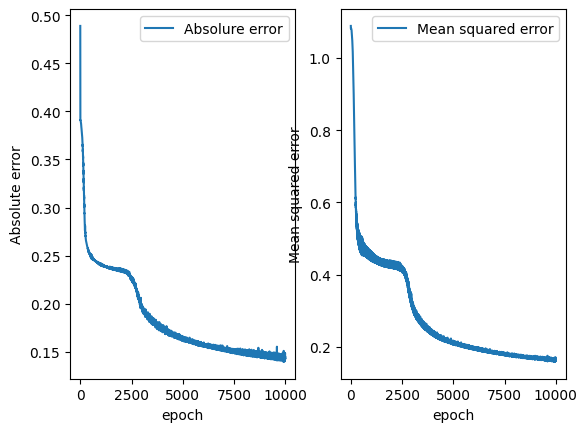

In [ ]:
if PLOT_TRAIN:
    plt.figure()
    plt.subplot(121)
    plt.plot(loss)
    plt.ylabel('Absolute error')
    plt.xlabel('epoch')
    plt.legend(['Absolure error'])
    plt.subplot(122)
    plt.plot(mean_error)
    plt.ylabel('Mean squared error')
    plt.xlabel('epoch')
    plt.legend(['Mean squared error'])
    plt.show()

In [ ]:
# Run the model on the test data
y_pred_norm = model.predict(x_test_norm)
 
# Reverse the normalization of the labels
y_pred = y_pred_norm*ystd1 + ymean1
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test_norm)


15/15 [==============================] - 0s 1ms/step - loss: 1.7294 - mean_squared_error: 7.2827


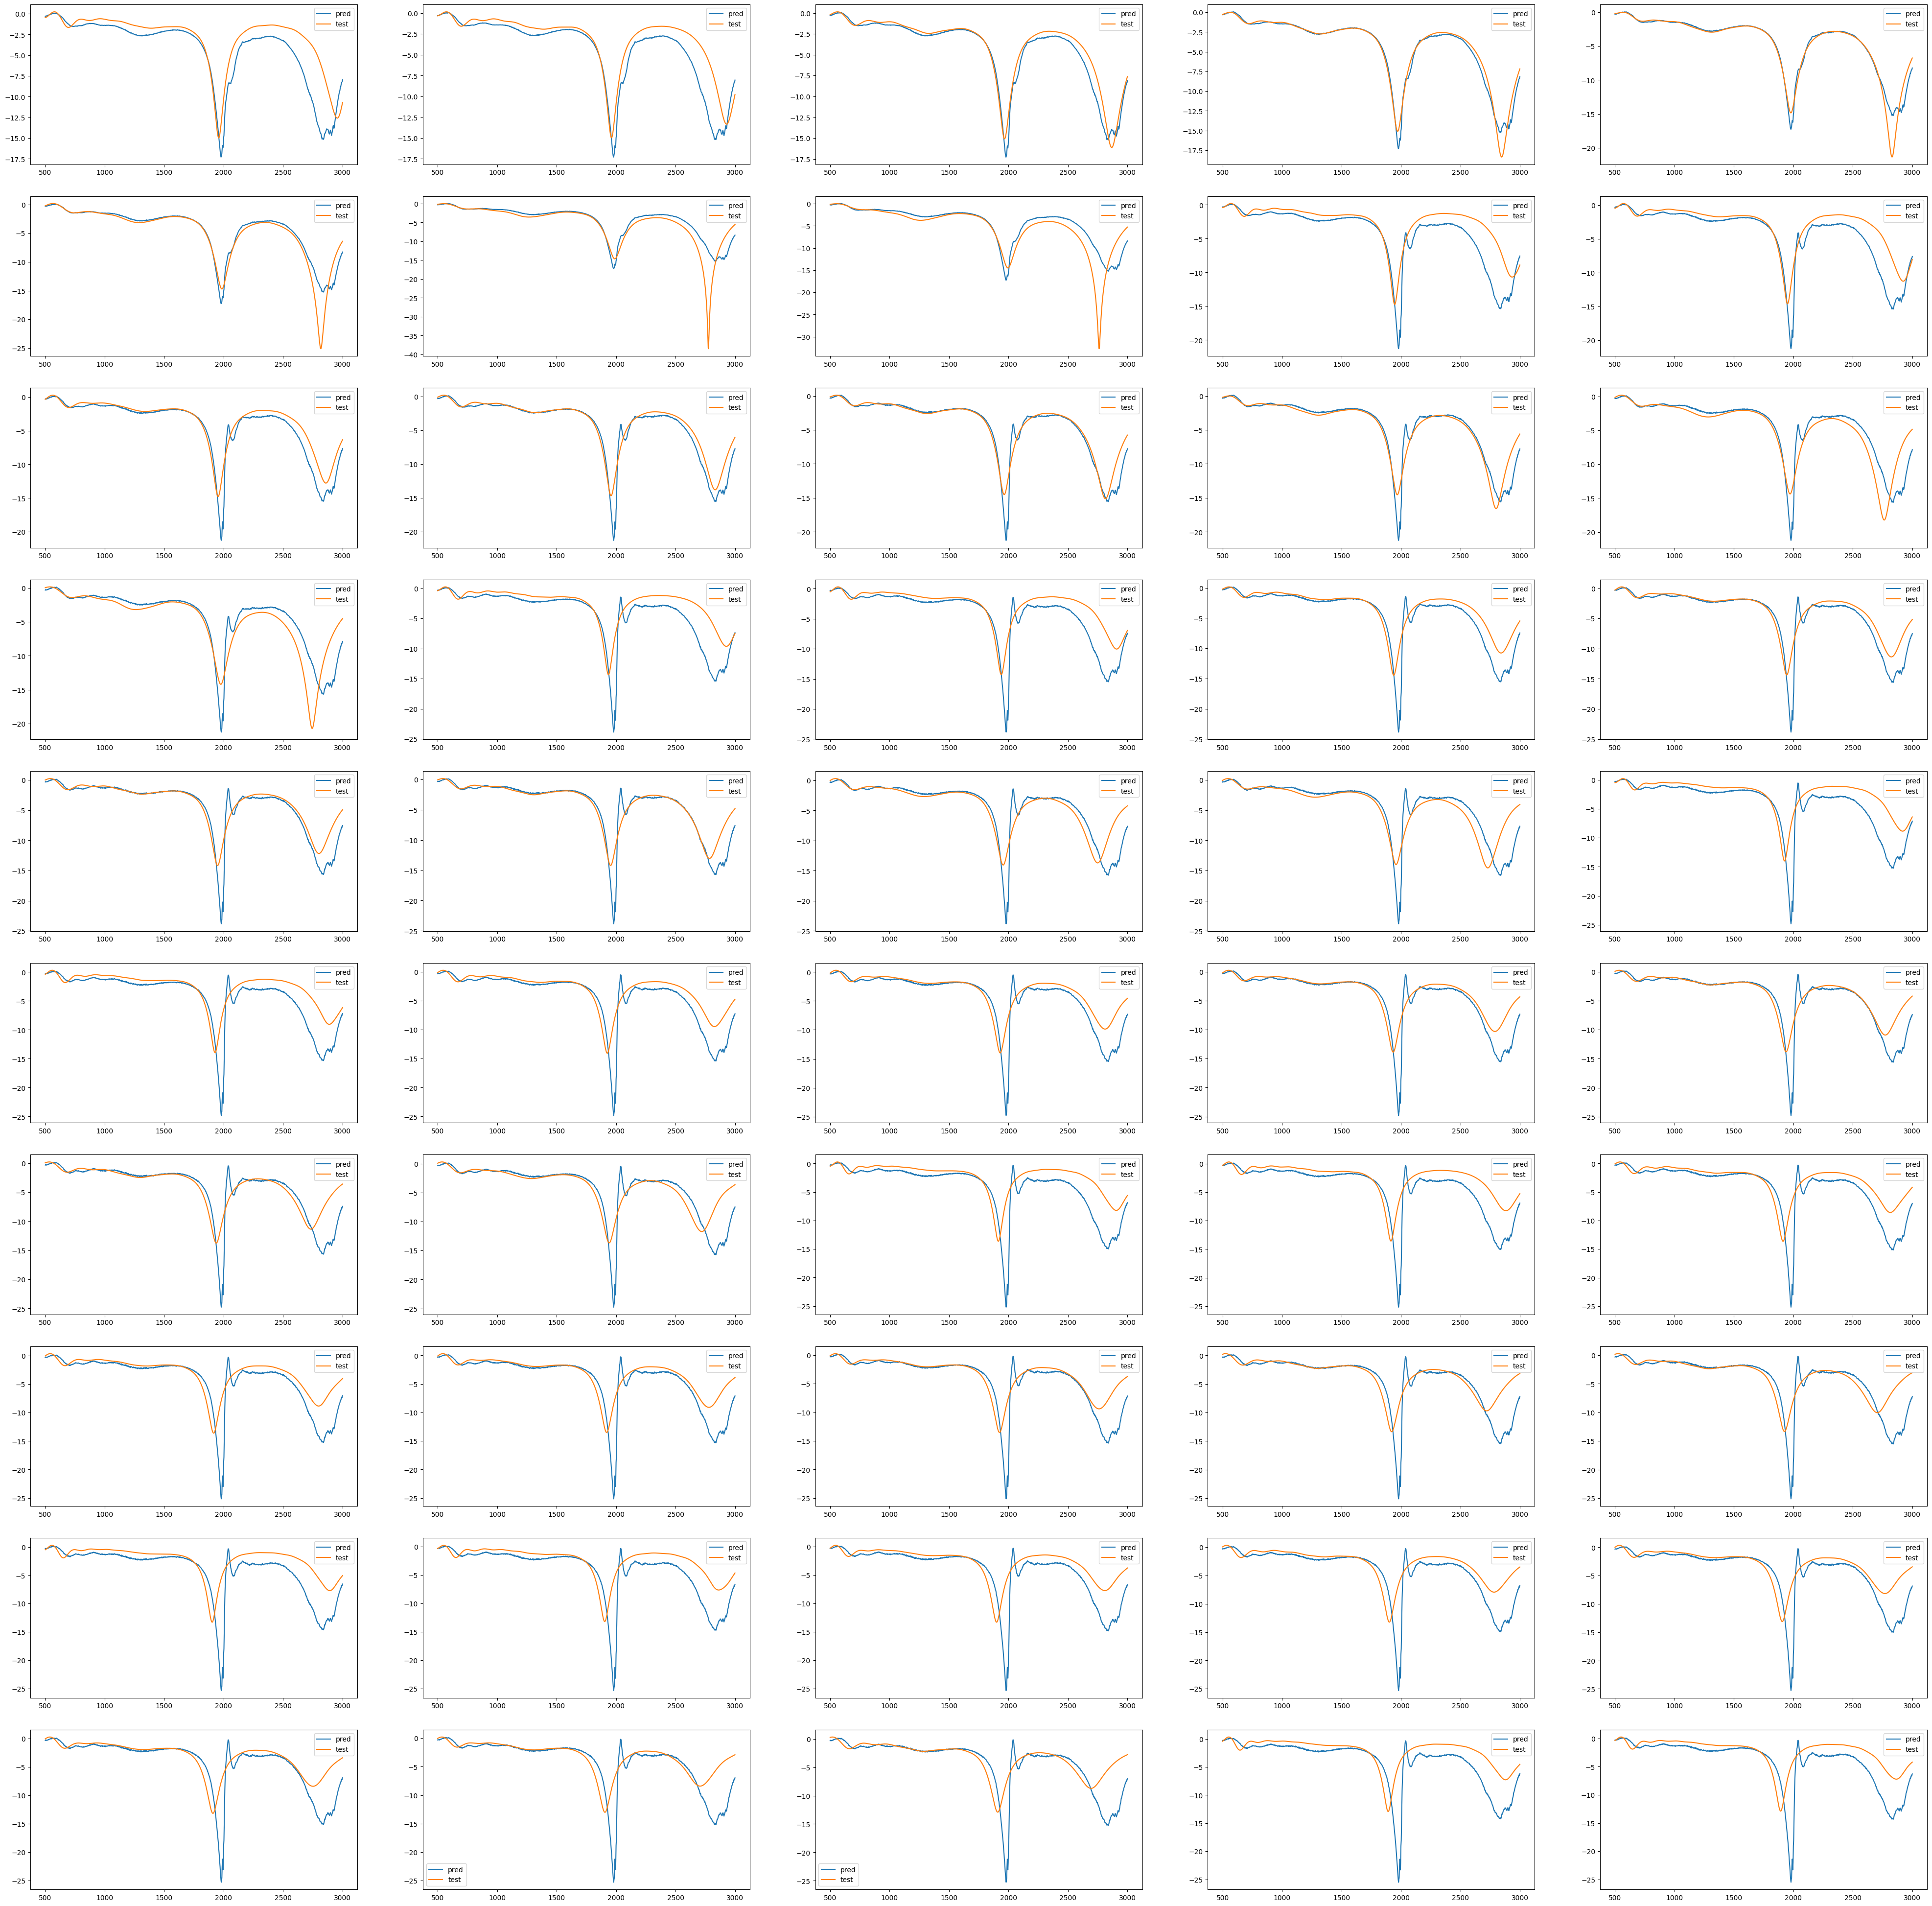

In [ ]:

#Plot the results
if PLOT_TEST:
    plt.figure(figsize=(50, 50))
    for i in range(50):
        plt.subplot(10, 5, i+1)
        plt.plot(frequency,y_pred[i])
        plt.plot(frequency,y_test[i])
        plt.legend(['pred', 'test'])
plt.show()